In [10]:
import pandas as pd
foodData=pd.read_csv(r'C:\Users\amrit\Downloads\food_coded.csv')

In [11]:
print(foodData)

       GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0      2.4       2          1               430           NaN           315.0   
1    3.654       1          1               610           3.0           420.0   
2      3.3       1          1               720           4.0           420.0   
3      3.2       1          1               430           3.0           420.0   
4      3.5       1          1               720           2.0           420.0   
..     ...     ...        ...               ...           ...             ...   
120    3.5       1          1               610           4.0           420.0   
121      3       1          1               265           2.0           315.0   
122  3.882       1          1               720           NaN           420.0   
123      3       2          1               720           4.0           420.0   
124    3.9       1          1               430           NaN           315.0   

     coffee                

In [12]:
print(foodData.columns)


Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [14]:
column=['cook','eating_out','employment','ethnic_food', 'exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

In [15]:
foodData=foodData[column]


In [16]:
print(foodData)

     cook  eating_out  employment  ethnic_food  exercise  fruit_day  income  \
0     2.0           3         3.0            1       1.0          5     5.0   
1     3.0           2         2.0            4       1.0          4     4.0   
2     1.0           2         3.0            5       2.0          5     6.0   
3     2.0           2         3.0            5       3.0          4     6.0   
4     1.0           2         2.0            4       1.0          4     6.0   
..    ...         ...         ...          ...       ...        ...     ...   
120   3.0           2         1.0            4       2.0          5     4.0   
121   3.0           4         3.0            3       2.0          4     2.0   
122   3.0           3         3.0            5       2.0          4     2.0   
123   3.0           5         2.0            2       1.0          5     4.0   
124   NaN           1         2.0            3       2.0          3     5.0   

     on_off_campus  pay_meal_out  sports  veggies_d

In [17]:
import seaborn as sns

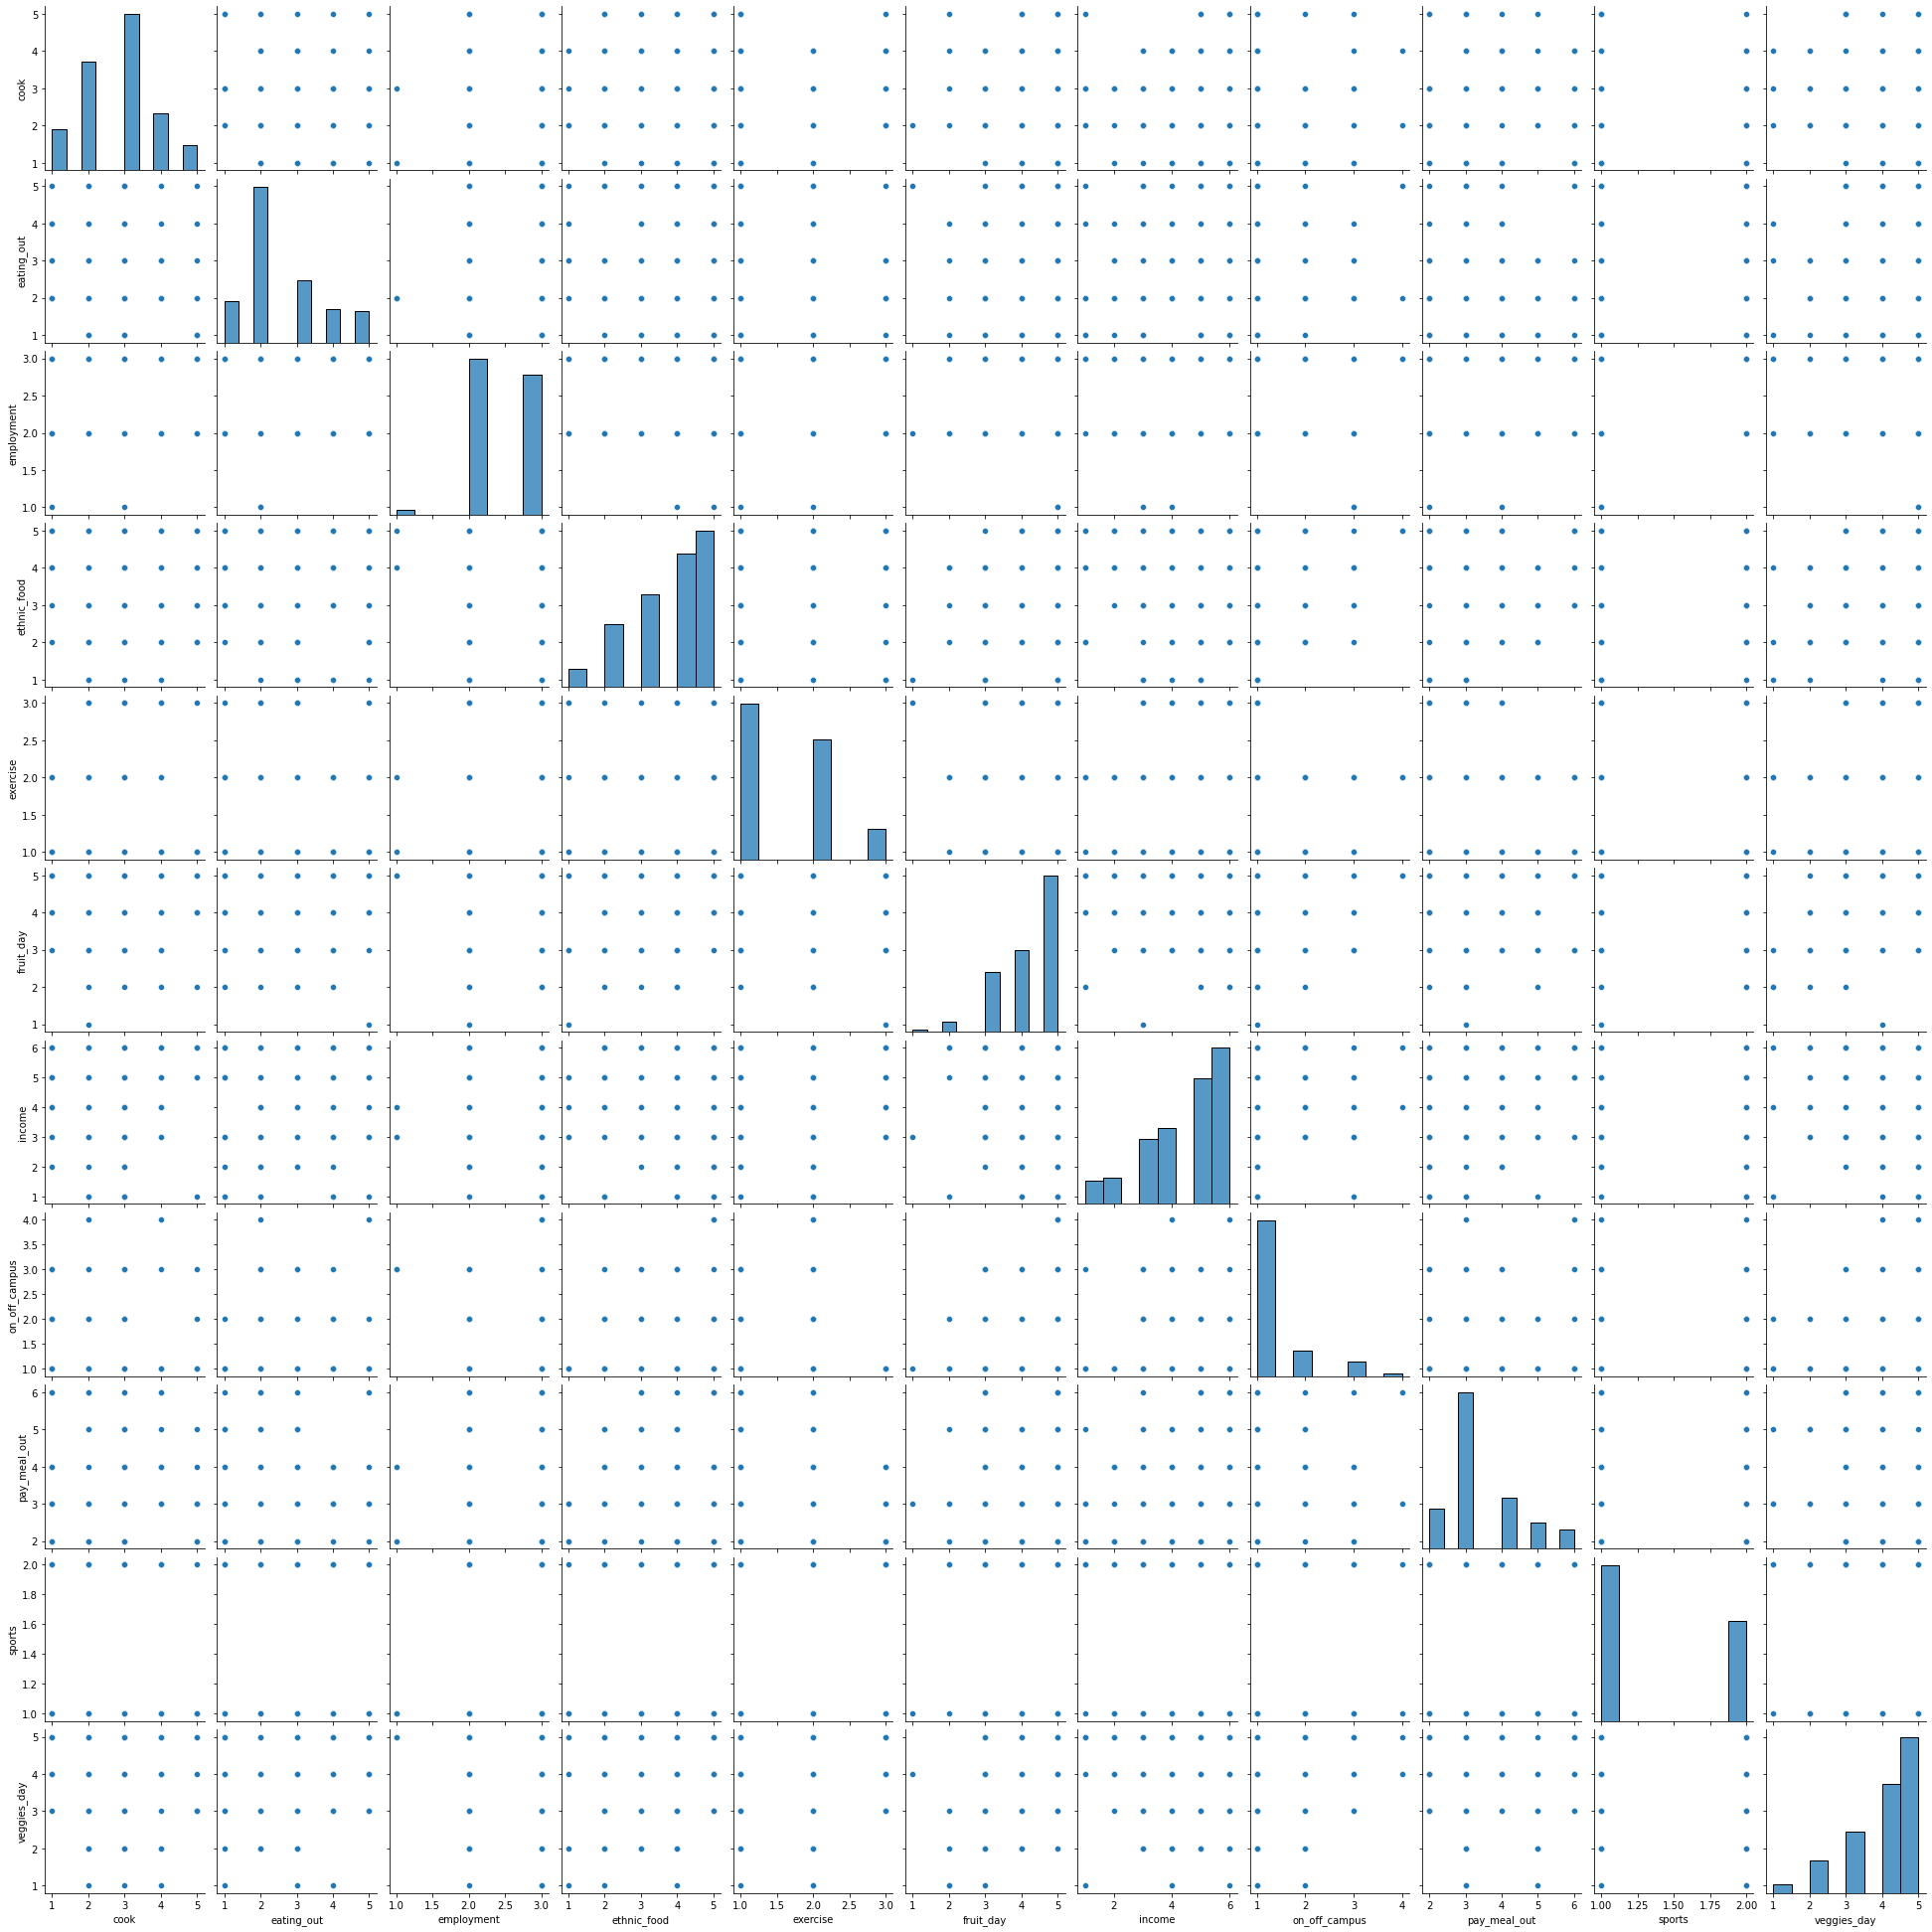

In [18]:
sns.pairplot(foodData)

[Text(1, 0, 'cook'),
 Text(2, 0, 'eating_out'),
 Text(3, 0, 'employment'),
 Text(4, 0, 'ethnic_food'),
 Text(5, 0, 'exercise'),
 Text(6, 0, 'fruit_day'),
 Text(7, 0, 'income'),
 Text(8, 0, 'on_off_campus'),
 Text(9, 0, 'pay_meal_out'),
 Text(10, 0, 'sports'),
 Text(11, 0, 'veggies_day')]

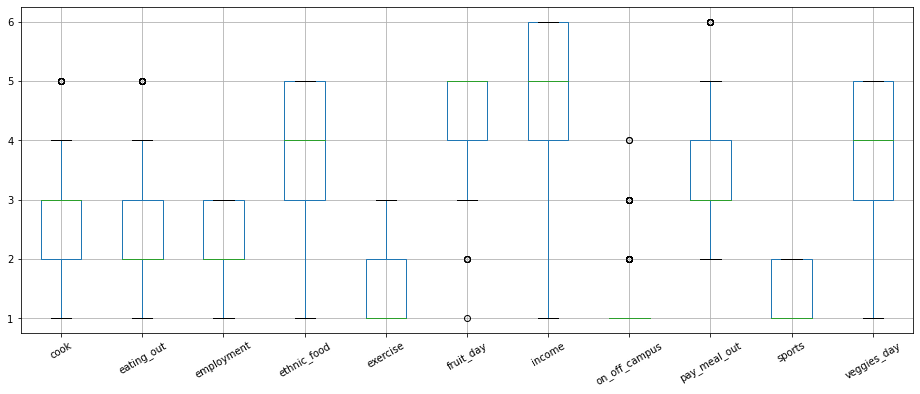

In [19]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
ax=foodData.boxplot(figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [20]:
foodData.shape

(125, 11)

In [21]:
s=foodData.dropna()

In [22]:
## for data
import numpy as np
import pandas as pd
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for geospatial
import folium
import geopy
## for machine learning
from sklearn import preprocessing, cluster
import scipy


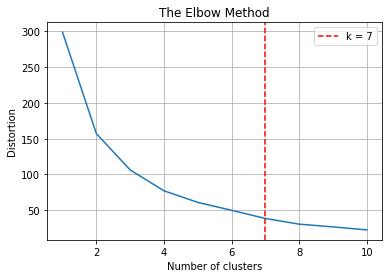

In [23]:
f=['cook','income']
X = s[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [24]:
from pandas.io.json import json_normalize
import folium
from geopy.geocoders import Nominatim 
import requests
CLIENT_ID = "" # your Foursquare ID
CLIENT_SECRET = "" # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000

In [25]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    25.612677, 85.158875,
    30000, 
    LIMIT)

In [26]:
results = requests.get(url).json()

In [30]:
results

{'meta': {'code': 200, 'requestId': '607f06ebb51b885777325dbb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Patna',
  'headerFullLocation': 'Patna',
  'headerLocationGranularity': 'city',
  'totalResults': 23,
  'suggestedBounds': {'ne': {'lat': 25.882677270000272,
    'lng': 85.45773839096819},
   'sw': {'lat': 25.34267672999973, 'lng': 84.8600116090318}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f3e03c2e4b0382fc0b94f73',
       'name': '17 Degrees',
       'location': {'address': 'P&M Mall 6th Floor',
        'lat': 25.63440070617493,
        'lng': 85.10625737377028,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.63440070617493,
          'lng':

In [33]:
venues = results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(venues)

In [34]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.city,venue.location.state,venue.location.crossStreet,venue.location.postalCode
0,e-0-4f3e03c2e4b0382fc0b94f73-0,0,"[{'summary': 'This spot is popular', 'type': '...",4f3e03c2e4b0382fc0b94f73,17 Degrees,P&M Mall 6th Floor,25.634401,85.106257,"[{'label': 'display', 'lat': 25.63440070617493...",5808,IN,India,"[P&M Mall 6th Floor, India]","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,NaN,NaN
1,e-0-4ea76e9f49011f902154d144-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ea76e9f49011f902154d144,Patna Zoo,"Bailey Rd, Patna, Bihar",25.600763,85.097267,"[{'label': 'display', 'lat': 25.60076259474524...",6325,IN,India,"[Bailey Rd, Patna, Bihar, Patna, Bihār, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],Patna,Bihār,NaN,NaN
2,e-0-4de847a6b0fbcb7c9ac04ab4-2,0,"[{'summary': 'This spot is popular', 'type': '...",4de847a6b0fbcb7c9ac04ab4,Patna Golf Club,Bailey Road,25.602367,85.095892,"[{'label': 'display', 'lat': 25.60236668226564...",6425,IN,India,"[Bailey Road (Sheikhpura), Patna 800014, Bihār...","[{'id': '4bf58dd8d48988d1e6941735', 'name': 'G...",0,[],Patna,Bihār,Sheikhpura,800014
3,e-0-4f464dbde4b07a6329d1c30b-3,0,"[{'summary': 'This spot is popular', 'type': '...",4f464dbde4b07a6329d1c30b,Cafe Coffee Day,"3rd Floor, P&M Mall",25.620594,85.112876,"[{'label': 'display', 'lat': 25.62059378732540...",4700,IN,India,"[3rd Floor, P&M Mall, Patna, Bihār, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Patna,Bihār,NaN,NaN
4,e-0-4e96d2bcb8f7d8c690f5dfd5-4,0,"[{'summary': 'This spot is popular', 'type': '...",4e96d2bcb8f7d8c690f5dfd5,Gandhi Maidan,NaN,25.617395,85.145020,"[{'label': 'display', 'lat': 25.617395, 'lng':...",1486,IN,India,"[Patna 800001, Bihār, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],Patna,Bihār,NaN,800001
5,e-0-4db407c40cb6729b6a8bba8b-5,0,"[{'summary': 'This spot is popular', 'type': '...",4db407c40cb6729b6a8bba8b,P&M Mall,"P&M Mall, Industrial Estate Campus, Patliputra...",25.634129,85.106248,"[{'label': 'display', 'lat': 25.63412855726511...",5796,IN,India,"[P&M Mall, Industrial Estate Campus, Patliputr...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],Patna,Bihār,Police Station- Fulwari,800013
6,e-0-5069a5a8e4b01437ca7802b5-6,0,"[{'summary': 'This spot is popular', 'type': '...",5069a5a8e4b01437ca7802b5,Domino's Pizza,Kankar Bagh,25.598122,85.162850,"[{'label': 'display', 'lat': 25.59812201083161...",1668,IN,India,"[Kankar Bagh (Kankar Bagh), Patna 800 020, Bih...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[],Patna,Bihār,Kankar Bagh,800 020
7,e-0-4e6b50c652b1c120603004cc-7,0,"[{'summary': 'This spot is popular', 'type': '...",4e6b50c652b1c120603004cc,Gargee Grand,Exhibition Road,25.612909,85.143276,"[{'label': 'display', 'lat': 25.61290914639022...",1565,IN,India,"[Exhibition Road, Patna 800001, Bihār, India]","[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",0,[],Patna,Bihār,NaN,800001
8,e-0-50ba1c0ce4b0fb1ae359c7fb-8,0,"[{'summary': 'This spot is popular', 'type': '...",50ba1c0ce4b0fb1ae359c7fb,KFC,Regent Cinema,25.617291,85.149713,"[{'label': 'display', 'lat': 25.61729116806615...",1053,IN,India,"[Regent Cinema (Gandhi Maidan.), India]","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],NaN,NaN,Gandhi Maidan.,NaN
9,e-0-533eb59e498efb2aae15cf98-9,0,"[{'summary': 'This spot is popular', 'type': '...",533eb59e498efb2aae15cf98,Cafe Coffee Day,NaN,25.594408,85.091366,"[{'label': 'display', 'lat': 25.59440807113849...",7075,IN,India,"[Airport, Patna, Bihār, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Patna,Bihār,Airport,NaN


In [35]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      25.612677, 85.158875,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    nearby_venue = pd.json_normalize(venue)
    df=nearby_venue['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['restaurant']=resta
nearby_venues['others']=oth
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.city,venue.location.state,venue.location.crossStreet,venue.location.postalCode,restaurant,others
0,e-0-4f3e03c2e4b0382fc0b94f73-0,0,"[{'summary': 'This spot is popular', 'type': '...",4f3e03c2e4b0382fc0b94f73,17 Degrees,P&M Mall 6th Floor,25.634401,85.106257,"[{'label': 'display', 'lat': 25.63440070617493...",5808,...,"[P&M Mall 6th Floor, India]","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,NaN,NaN,1,4
1,e-0-4ea76e9f49011f902154d144-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ea76e9f49011f902154d144,Patna Zoo,"Bailey Rd, Patna, Bihar",25.600763,85.097267,"[{'label': 'display', 'lat': 25.60076259474524...",6325,...,"[Bailey Rd, Patna, Bihar, Patna, Bihār, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],Patna,Bihār,NaN,NaN,1,4
2,e-0-4de847a6b0fbcb7c9ac04ab4-2,0,"[{'summary': 'This spot is popular', 'type': '...",4de847a6b0fbcb7c9ac04ab4,Patna Golf Club,Bailey Road,25.602367,85.095892,"[{'label': 'display', 'lat': 25.60236668226564...",6425,...,"[Bailey Road (Sheikhpura), Patna 800014, Bihār...","[{'id': '4bf58dd8d48988d1e6941735', 'name': 'G...",0,[],Patna,Bihār,Sheikhpura,800014,1,4
3,e-0-4f464dbde4b07a6329d1c30b-3,0,"[{'summary': 'This spot is popular', 'type': '...",4f464dbde4b07a6329d1c30b,Cafe Coffee Day,"3rd Floor, P&M Mall",25.620594,85.112876,"[{'label': 'display', 'lat': 25.62059378732540...",4700,...,"[3rd Floor, P&M Mall, Patna, Bihār, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Patna,Bihār,NaN,NaN,1,4
4,e-0-4e96d2bcb8f7d8c690f5dfd5-4,0,"[{'summary': 'This spot is popular', 'type': '...",4e96d2bcb8f7d8c690f5dfd5,Gandhi Maidan,NaN,25.617395,85.145020,"[{'label': 'display', 'lat': 25.617395, 'lng':...",1486,...,"[Patna 800001, Bihār, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],Patna,Bihār,NaN,800001,1,4
5,e-0-4db407c40cb6729b6a8bba8b-5,0,"[{'summary': 'This spot is popular', 'type': '...",4db407c40cb6729b6a8bba8b,P&M Mall,"P&M Mall, Industrial Estate Campus, Patliputra...",25.634129,85.106248,"[{'label': 'display', 'lat': 25.63412855726511...",5796,...,"[P&M Mall, Industrial Estate Campus, Patliputr...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],Patna,Bihār,Police Station- Fulwari,800013,1,4
6,e-0-5069a5a8e4b01437ca7802b5-6,0,"[{'summary': 'This spot is popular', 'type': '...",5069a5a8e4b01437ca7802b5,Domino's Pizza,Kankar Bagh,25.598122,85.162850,"[{'label': 'display', 'lat': 25.59812201083161...",1668,...,"[Kankar Bagh (Kankar Bagh), Patna 800 020, Bih...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[],Patna,Bihār,Kankar Bagh,800 020,1,4
7,e-0-4e6b50c652b1c120603004cc-7,0,"[{'summary': 'This spot is popular', 'type': '...",4e6b50c652b1c120603004cc,Gargee Grand,Exhibition Road,25.612909,85.143276,"[{'label': 'display', 'lat': 25.61290914639022...",1565,...,"[Exhibition Road, Patna 800001, Bihār, India]","[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",0,[],Patna,Bihār,NaN,800001,1,4
8,e-0-50ba1c0ce4b0fb1ae359c7fb-8,0,"[{'summary': 'This spot is popular', 'type': '...",50ba1c0ce4b0fb1ae359c7fb,KFC,Regent Cinema,25.617291,85.149713,"[{'label': 'display', 'lat': 25.61729116806615...",1053,...,"[Regent Cinema (Gandhi Maidan.), India]","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],NaN,NaN,Gandhi Maidan.,NaN,1,4
9,e-0-533eb59e498efb2aae15cf98-9,0,"[{'summary': 'This spot is popular', 'type': '...",533eb59e498efb2aae15cf98,Cafe Coffee Day,NaN,25.594408,85.091366,"[{'label': 'display', 'lat': 25.59440807113849...",7075,...,"[Airport, Patna, Bihār, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Patna,Bihār,Airport,NaN,1,4


In [36]:
lat=nearby_venues['venue.location.lat']
long=nearby_venues['venue.location.lng']

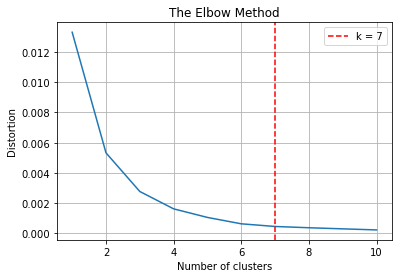

In [37]:
f=['venue.location.lat','venue.location.lng']
X = nearby_venues[f]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i 
     in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()

In [40]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,...,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.city,venue.location.state,venue.location.crossStreet,venue.location.postalCode,restaurant,others
0,e-0-4f3e03c2e4b0382fc0b94f73-0,0,"[{'summary': 'This spot is popular', 'type': '...",4f3e03c2e4b0382fc0b94f73,17 Degrees,P&M Mall 6th Floor,25.634401,85.106257,"[{'label': 'display', 'lat': 25.63440070617493...",5808,...,"[P&M Mall 6th Floor, India]","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],NaN,NaN,NaN,NaN,1,4
1,e-0-4ea76e9f49011f902154d144-1,0,"[{'summary': 'This spot is popular', 'type': '...",4ea76e9f49011f902154d144,Patna Zoo,"Bailey Rd, Patna, Bihar",25.600763,85.097267,"[{'label': 'display', 'lat': 25.60076259474524...",6325,...,"[Bailey Rd, Patna, Bihar, Patna, Bihār, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],Patna,Bihār,NaN,NaN,1,4
2,e-0-4de847a6b0fbcb7c9ac04ab4-2,0,"[{'summary': 'This spot is popular', 'type': '...",4de847a6b0fbcb7c9ac04ab4,Patna Golf Club,Bailey Road,25.602367,85.095892,"[{'label': 'display', 'lat': 25.60236668226564...",6425,...,"[Bailey Road (Sheikhpura), Patna 800014, Bihār...","[{'id': '4bf58dd8d48988d1e6941735', 'name': 'G...",0,[],Patna,Bihār,Sheikhpura,800014,1,4
3,e-0-4f464dbde4b07a6329d1c30b-3,0,"[{'summary': 'This spot is popular', 'type': '...",4f464dbde4b07a6329d1c30b,Cafe Coffee Day,"3rd Floor, P&M Mall",25.620594,85.112876,"[{'label': 'display', 'lat': 25.62059378732540...",4700,...,"[3rd Floor, P&M Mall, Patna, Bihār, India]","[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",0,[],Patna,Bihār,NaN,NaN,1,4
4,e-0-4e96d2bcb8f7d8c690f5dfd5-4,0,"[{'summary': 'This spot is popular', 'type': '...",4e96d2bcb8f7d8c690f5dfd5,Gandhi Maidan,NaN,25.617395,85.145020,"[{'label': 'display', 'lat': 25.617395, 'lng':...",1486,...,"[Patna 800001, Bihār, India]","[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",0,[],Patna,Bihār,NaN,800001,1,4


In [38]:
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.cc',
       'venue.location.country', 'venue.location.formattedAddress',
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.city', 'venue.location.state',
       'venue.location.crossStreet', 'venue.location.postalCode', 'restaurant',
       'others'],
      dtype='object')

In [42]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [43]:
n.columns

Index(['venue.location.lat', 'venue.location.lng',
       'venue.location.formattedAddress', 'restaurant', 'others'],
      dtype='object')

In [44]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,restaurant,others
0,25.634401,85.106257,"[P&M Mall 6th Floor, India]",1,4
1,25.600763,85.097267,"[Bailey Rd, Patna, Bihar, Patna, Bihār, India]",1,4
2,25.602367,85.095892,"[Bailey Road (Sheikhpura), Patna 800014, Bihār...",1,4
3,25.620594,85.112876,"[3rd Floor, P&M Mall, Patna, Bihār, India]",1,4
4,25.617395,85.145020,"[Patna 800001, Bihār, India]",1,4
5,25.634129,85.106248,"[P&M Mall, Industrial Estate Campus, Patliputr...",1,4
6,25.598122,85.162850,"[Kankar Bagh (Kankar Bagh), Patna 800 020, Bih...",1,4
7,25.612909,85.143276,"[Exhibition Road, Patna 800001, Bihār, India]",1,4
8,25.617291,85.149713,"[Regent Cinema (Gandhi Maidan.), India]",1,4
9,25.594408,85.091366,"[Airport, Patna, Bihār, India]",1,4


In [45]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long'})
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,25.634401,85.106257,"[P&M Mall 6th Floor, India]",1,4
1,25.600763,85.097267,"[Bailey Rd, Patna, Bihar, Patna, Bihār, India]",1,4
2,25.602367,85.095892,"[Bailey Road (Sheikhpura), Patna 800014, Bihār...",1,4
3,25.620594,85.112876,"[3rd Floor, P&M Mall, Patna, Bihār, India]",1,4
4,25.617395,85.145020,"[Patna 800001, Bihār, India]",1,4
5,25.634129,85.106248,"[P&M Mall, Industrial Estate Campus, Patliputr...",1,4
6,25.598122,85.162850,"[Kankar Bagh (Kankar Bagh), Patna 800 020, Bih...",1,4
7,25.612909,85.143276,"[Exhibition Road, Patna 800001, Bihār, India]",1,4
8,25.617291,85.149713,"[Regent Cinema (Gandhi Maidan.), India]",1,4
9,25.594408,85.091366,"[Airport, Patna, Bihār, India]",1,4


In [46]:
n['venue.location.formattedAddress']

0                           [P&M Mall 6th Floor, India]
1        [Bailey Rd, Patna, Bihar, Patna, Bihār, India]
2     [Bailey Road (Sheikhpura), Patna 800014, Bihār...
3            [3rd Floor, P&M Mall, Patna, Bihār, India]
4                          [Patna 800001, Bihār, India]
5     [P&M Mall, Industrial Estate Campus, Patliputr...
6     [Kankar Bagh (Kankar Bagh), Patna 800 020, Bih...
7         [Exhibition Road, Patna 800001, Bihār, India]
8               [Regent Cinema (Gandhi Maidan.), India]
9                        [Airport, Patna, Bihār, India]
10    [Regent Cinema (Gandhi Maidan), Patna, Bihār, ...
11               [Income Tax Dept. Rd. Crossing, India]
12                                              [India]
13         [Beer Chand Patel Marg, Patna, Bihār, India]
14    [Santosha Complex, Bandar Bageecha (Dak Bungal...
15    [PLOT NO.DS-22, JAGDEVA PLAZA, LOHIA NAGAR, KA...
16    [SHOP NO. 1, GROUND FLOOR,, PLOT NO. 859,, MAU...
17    [1, South Gandhi Maidan (Frazer Road), Pat

In [47]:
spec_chars = ["[","]"]
for char in spec_chars:
  n['venue.location.formattedAddress'] = n['venue.location.formattedAddress'].astype(str).str.replace(char, ' ')

In [48]:
n

,lat,long,venue.location.formattedAddress,restaurant,others
0,25.634401,85.106257,"'P&M Mall 6th Floor', 'India'",1,4
1,25.600763,85.097267,"'Bailey Rd, Patna, Bihar', 'Patna', 'Bihār', ...",1,4
2,25.602367,85.095892,"'Bailey Road (Sheikhpura)', 'Patna 800014', '...",1,4
3,25.620594,85.112876,"'3rd Floor, P&M Mall', 'Patna', 'Bihār', 'Ind...",1,4
4,25.617395,85.145020,"'Patna 800001', 'Bihār', 'India'",1,4
5,25.634129,85.106248,"'P&M Mall, Industrial Estate Campus, Patliput...",1,4
6,25.598122,85.162850,"'Kankar Bagh (Kankar Bagh)', 'Patna 800 020',...",1,4
7,25.612909,85.143276,"'Exhibition Road', 'Patna 800001', 'Bihār', '...",1,4
8,25.617291,85.149713,"'Regent Cinema (Gandhi Maidan.)', 'India'",1,4
9,25.594408,85.091366,"'Airport', 'Patna', 'Bihār', 'India'",1,4


In [55]:
x, y = "lat", "long"
color = "restaurant"
size = "others"
popup = "venue.location.formattedAddress"
data = n.copy()
location = [25.612677, 85.158875]
## create color column
lst_colors=["red","green","orange"]
lst_elements = sorted(list(n[color].unique()))

## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=12)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]],popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend


## plot the map
map_

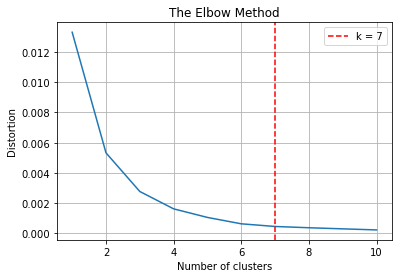

In [56]:
X = n[["lat","long"]]
max_k = 10
## iterations
distortions = [] 
for i in range(1, max_k+1):
    if len(X) >= i:
       model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
       model.fit(X)
       distortions.append(model.inertia_)
## best k: the lowest derivative
k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))
## plot
fig, ax = plt.subplots()
ax.plot(range(1, len(distortions)+1), distortions)
ax.axvline(k, ls='--', color="red", label="k = "+str(k))
ax.set(title='The Elbow Method', xlabel='Number of clusters', 
       ylabel="Distortion")
ax.legend()
ax.grid(True)
plt.show()


In [57]:
k = 7
model = cluster.KMeans(n_clusters=k, init='k-means++')
X = n[["lat","long"]]
## clustering
dtf_X = X.copy()
dtf_X["cluster"] = model.fit_predict(X)
## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     dtf_X.drop("cluster", axis=1).values)
dtf_X["centroids"] = 0
for i in closest:
    dtf_X["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = dtf_X[["cluster","centroids"]]
n

C:\Users\amrit\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,lat,long,venue.location.formattedAddress,restaurant,others,cluster,centroids
0,25.634401,85.106257,"'P&M Mall 6th Floor', 'India'",1,4,2,0
1,25.600763,85.097267,"'Bailey Rd, Patna, Bihar', 'Patna', 'Bihār', ...",1,4,1,1
2,25.602367,85.095892,"'Bailey Road (Sheikhpura)', 'Patna 800014', '...",1,4,1,0
3,25.620594,85.112876,"'3rd Floor, P&M Mall', 'Patna', 'Bihār', 'Ind...",1,4,4,0
4,25.617395,85.145020,"'Patna 800001', 'Bihār', 'India'",1,4,3,1
5,25.634129,85.106248,"'P&M Mall, Industrial Estate Campus, Patliput...",1,4,2,0
6,25.598122,85.162850,"'Kankar Bagh (Kankar Bagh)', 'Patna 800 020',...",1,4,5,1
7,25.612909,85.143276,"'Exhibition Road', 'Patna 800001', 'Bihār', '...",1,4,3,0
8,25.617291,85.149713,"'Regent Cinema (Gandhi Maidan.)', 'India'",1,4,3,0
9,25.594408,85.091366,"'Airport', 'Patna', 'Bihār', 'India'",1,4,1,0


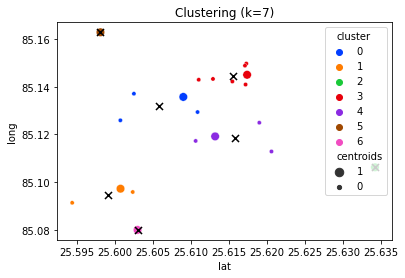

In [58]:
fig, ax = plt.subplots()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')
th_centroids = model.cluster_centers_
ax.scatter(th_centroids[:,0], th_centroids[:,1], s=50, c='black', 
           marker="x")

In [59]:
model = cluster.AffinityPropagation()

Text(0.5, 1.0, 'Clustering (k=7)')

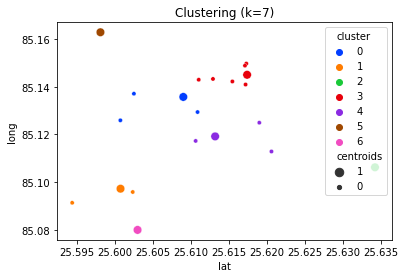

In [60]:
k = n["cluster"].nunique()
sns.scatterplot(x="lat", y="long", data=n, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size="centroids", size_order=[1,0],
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [76]:
x, y = "lat", "long"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
location = [25.612677, 85.158875]
data = n.copy()
## create color column
lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=12)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.DivIcon(html=f"""
            <div><svg>
                <circle cx="25" cy="25" r="20" fill="#69b3a2" opacity=".4"/>
                <rect x="20", y="20" width="10" height="10", fill="white", opacity=".5" 
            </svg></div>""")
    ).add_to(map_), axis=1)
## plot the map
map_